# <font color='Blue'>Project Information:</font>

This project comprises of applying various Data Science techniques. The data is collected through web scraping, which is mounted in the google drive and used further. The data is then downloaded from drive and uploaded on GitHub profile ritwiksinha53. The data is then loaded here. The project proceeds with Exploratory Data Analysis on the loaded data. The end of the project is building a statistical model.

# <font color='Blue'>About Data:</font>

The data collected is about the performance of Indian Men's Cricket team in the second decade of twenty first century (2010-2019) in One Day International matches.

#  <font color='green'> Importing necessary modules </font>

In [ ]:
import urllib.request as req
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



#  <font color='green'>Scraping the data</font>

In [ ]:
global headers
headers = ["team1", "team2", "winner", "margin", "ground", "match_date"]

def get_page(link):
    ''' Returns html page that you get using "inspect element" '''
    response = req.urlopen(link)
    output = response.read()
    response.close()
    output_soup = soup(output, "html.parser")
    return output_soup

def text(list_of_elements):
    ''' Returns the Series of data collected '''
    data = [list_of_elements[column].text for column in range(len(list_of_elements)) if column < 6]
    return pd.Series(data, index = headers)

cricket_data = pd.DataFrame(data = {}, columns = headers)

for year in range(2010, 2020):
    url = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=" + str(year) + ";team=6;type=year"
    output_soup = get_page(url)
    cricket_details = output_soup.findAll("tbody")[0].findAll("tr")
    for details in cricket_details:
        detail = details.findAll("td")
        cricket_row = text(detail)
        cricket_data = cricket_data.append(cricket_row, ignore_index = True)

#  <font color='green'>Mounting the data in Google Drive</font>

In [ ]:
drive.mount('/drive', force_remount=True)
cricket_data.to_csv('/drive/My Drive/Scrapped CSV files/India_ODI_Records.csv')

#  <font color='green'>Loading data and performing Exploratory Data Analysis</font>

In [ ]:
data = 'https://raw.githubusercontent.com/ritwiksinha53/cricket-analysis/master/India_ODI_Records.csv'
india_record = pd.read_csv(data, sep = ',')

In [ ]:
india_record.head()

,team1,team2,winner,margin,ground,match_date,year
0,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",2010
1,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",2010
2,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",2010
3,Bangladesh,India,India,6 wickets,Dhaka,"Jan 11, 2010",2010
4,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka,"Jan 13, 2010",2010


In [ ]:
## Adding a new column named 'result' which stores the data whether India has won the match or not in the dataframe
india_record['result'] = ['Won' if (x == 'India' or x == 'tied') else 'Lost' for x in india_record['winner']]

In [ ]:
india_record.head()

,team1,team2,winner,margin,ground,match_date,year,result
0,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",2010,Lost
1,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",2010,Won
2,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",2010,Won
3,Bangladesh,India,India,6 wickets,Dhaka,"Jan 11, 2010",2010,Won
4,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka,"Jan 13, 2010",2010,Lost


In [ ]:
india_record['result'].value_counts()

Won     163
Lost     86
Name: result, dtype: int64

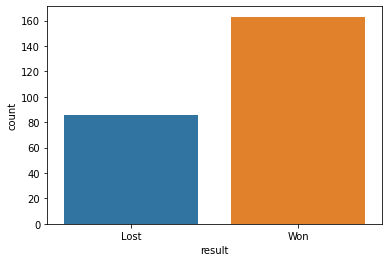

In [ ]:
sns.countplot(india_record['result'])

In [ ]:
fig = px.box(india_record, x="result", y="ground", points="all")
fig.show()

## THIS PLOT SHOWS THE VISUAL REPRESENTAION OF TOTAL NUMBER OF MATHCES INDIA HAS EITHER WON OR LOST AT A PARTICULAR GROUND

In [ ]:
fig1 = px.box(india_record, x="result", y="match_date", points="all")
fig1.show()

## THIS PLOT SHOWS THE VISUAL REPRESENTAION OF TOTAL NUMBER OF MATHCES INDIA HAS EITHER WON OR LOST ON A PARTICLUAR DAY

In [ ]:
fig3 = px.box(india_record, x="result", y="year", points="all")
fig3.show()

## THIS PLOT SHOWS THE VISUAL REPRESENTAION OF NUMBER OF MATHCES INDIA HAS EITHER WON OR LOST IN VARIOUS YEARS

In [ ]:
india_record['result']=india_record['result'].replace('Lost',0)
india_record['result']=india_record['result'].replace('Won',1)

In [ ]:
india_record.head()

,team1,team2,winner,margin,ground,match_date,year,result
0,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",2010,0
1,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",2010,1
2,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",2010,1
3,Bangladesh,India,India,6 wickets,Dhaka,"Jan 11, 2010",2010,1
4,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka,"Jan 13, 2010",2010,0


In [ ]:
rec = pd.to_datetime(india_record['match_date'])
india_record['match_date']=rec

In [ ]:
india_record.head()

,team1,team2,winner,margin,ground,match_date,year,result
0,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,2010-01-05,2010,0
1,Bangladesh,India,India,6 wickets,Dhaka,2010-01-07,2010,1
2,India,Sri Lanka,India,8 wickets,Dhaka,2010-01-10,2010,1
3,Bangladesh,India,India,6 wickets,Dhaka,2010-01-11,2010,1
4,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka,2010-01-13,2010,0


In [ ]:
india_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   team1       249 non-null    object        
 1   team2       249 non-null    object        
 2   winner      249 non-null    object        
 3   margin      236 non-null    object        
 4   ground      249 non-null    object        
 5   match_date  249 non-null    datetime64[ns]
 6   year        249 non-null    int64         
 7   result      249 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 15.7+ KB


#  <font color='green'>Statistical Modelling</font>

In [ ]:
X1 = india_record.drop(['team1','team2','winner','margin','ground','match_date','result'],axis=1)
Y1 = india_record['result'].values

#  <font color='blue'>Logistic Regression</font>

In [ ]:
#Logistic Regression Model
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.1, random_state=42)
logreg = LogisticRegression(solver='liblinear',C=0.5,random_state=42,max_iter=500,class_weight='balanced')

logreg.fit(X1_train,y1_train)
#predict
y1_predict = logreg.predict(X1_test)
training_accuracy1 = logreg.score(X1_train,y1_train)
print('training_accuracy:',training_accuracy1)

testing_accuracy1 = logreg.score(X1_test,y1_test)
print('testing_accuracy:',testing_accuracy1)

training_accuracy: 0.65625
testing_accuracy: 0.64


#  <font color='blue'>Decision Tree</font>

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.2, random_state=500000)
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=30,
                                 max_features='auto',min_samples_leaf=5,splitter='best',class_weight='balanced')
dt_model.fit(X1_train,y1_train)
y_pred_dt = dt_model.predict(X1_test)
print("Trainig accuracy",dt_model.score(X1_train,y1_train))
print("Testing accuracy",dt_model.score(X1_test, y1_test))

Trainig accuracy 0.5829145728643216
Testing accuracy 0.52


#  <font color='blue'>Ada Boost</font>

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.1, random_state=44)
AdaBoost_model = AdaBoostClassifier()
AdaBoost_model.fit(X1_train,y1_train)

y_pred_Ada = AdaBoost_model.predict(X1_test)

print("Trainig accuracy",AdaBoost_model.score(X1_train,y1_train))  
print("Testing accuracy",AdaBoost_model.score(X1_test, y1_test))

Trainig accuracy 0.65625
Testing accuracy 0.64


#  <font color='blue'>Gradient Boost</font>

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.1, random_state=47)
g_boost_model = GradientBoostingClassifier(learning_rate=0.07,n_estimators=70,subsample=0.2,max_depth=12,random_state=42)
g_boost_model.fit(X1_train,y1_train)
y_pred_g_boost = g_boost_model.predict(X1_test)

print("Trainig accuracy",g_boost_model.score(X1_train,y1_train))  
print("Testing accuracy",g_boost_model.score(X1_test, y1_test))

Trainig accuracy 0.6607142857142857
Testing accuracy 0.6


#  <font color='blue'>XG Boost</font>

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.1, random_state=42)
xg_boost_model = XGBClassifier(class_weight='balanced')
xg_boost_model.fit(X1_train,y1_train)
y_pred_xg_boost = g_boost_model.predict(X1_test)
print("Trainig accuracy",xg_boost_model.score(X1_train,y1_train))  
print("Testing accuracy",xg_boost_model.score(X1_test, y1_test))

Trainig accuracy 0.65625
Testing accuracy 0.64


#  <font color='blue'>Random Forest</font>

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X1_train,y1_train)
y_pred_rf = dt_model.predict(X1_test)
print("Trainig accuracy",rf_model.score(X1_train,y1_train))  
print("Testing accuracy",rf_model.score(X1_test, y1_test))

Trainig accuracy 0.5628140703517588
Testing accuracy 0.54


#  <font color='blue'>Bagging</font>

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.1, random_state=42)
Bag_model = BaggingClassifier()
Bag_model.fit(X1_train,y1_train)
y_pred_bag = Bag_model.predict(X1_test)
print("Trainig accuracy",Bag_model.score(X1_train,y1_train))  
print("Testing accuracy",Bag_model.score(X1_test, y1_test))

Trainig accuracy 0.65625
Testing accuracy 0.64


#  <font color='red'>Balancing Techniques</font>

In [ ]:
## Getting ready for applying different balancing techniques
#Undersampled Data
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X1, Y1)
print('Resampled dataset shape %s' % Counter(y_under))

#Oversampled Data
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X1, Y1)
print('Resampled dataset shape %s' % Counter(y_over))

#SMOTE Data
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X1, Y1)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 86, 1: 86})
Resampled dataset shape Counter({0: 163, 1: 163})
Resampled dataset shape Counter({0: 163, 1: 163})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



#  <font color='blue'>Logistic Regression - Undersample</font>

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_under,y_under, test_size = 0.20, random_state=42 )
#Logistic Regression Model
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.3, random_state=42)
logreg = LogisticRegression(solver='newton-cg',C=0.5,random_state=42,max_iter=500)

logreg.fit(X1_train,y1_train)
#predict
y_predict = logreg.predict(X1_test)
training_accuracy = logreg.score(X1_train,y1_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = logreg.score(X1_test,y1_test)
print('testing_accuracy:',testing_accuracy)

training_accuracy: 0.6839080459770115
testing_accuracy: 0.5866666666666667


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge



#  <font color='blue'>Logistic Regression - Oversample</font>

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_over,y_over, test_size = 0.20, random_state=42 )
#Logistic Regression Model
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.3, random_state=42)
logreg = LogisticRegression(random_state=42, solver="lbfgs",penalty='l2',C=0.5,tol=0.001,max_iter=1000)

logreg.fit(X1_train,y1_train)
#predict
y_predict = logreg.predict(X1_test)
training_accuracy = logreg.score(X1_train,y1_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = logreg.score(X1_test,y1_test)
print('testing_accuracy:',testing_accuracy)

training_accuracy: 0.6839080459770115
testing_accuracy: 0.5866666666666667


#  <font color='blue'>Logistic Regression - SMOTE</font>

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_smote,y_smote, test_size = 0.20, random_state=42 )
#Logistic Regression Model
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.3, random_state=42)
logreg = LogisticRegression(random_state=42, solver="lbfgs",penalty='l2',C=0.5,tol=0.001,max_iter=1000)

logreg.fit(X1_train,y1_train)
#predict
y_predict = logreg.predict(X1_test)
training_accuracy = logreg.score(X1_train,y1_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = logreg.score(X1_test,y1_test)
print('testing_accuracy:',testing_accuracy)

training_accuracy: 0.6839080459770115
testing_accuracy: 0.5866666666666667


#  <font color='red'>Balancing techniques does not improves the model, hence not applying these techniques</font>

#  <font color='Gold'>End of project</font>